In [2]:
!pip install nltk==3.8.1
!pip install sastrawi


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
file = pd.read_csv('c:/Users/REVAN/Documents/ML/Sentiment analysis grab/Grab dataset/Grab.csv')
file.head()

,userName,at,content
0,Pengguna Google,2025-01-24 16:41:09,"barusan gua mau order, tiba2 akun nya ke close..."
1,Pengguna Google,2025-01-24 11:24:30,"Halo grab, hari ini saya mau buka aplikasi, ke..."
2,Pengguna Google,2025-01-24 08:14:31,apk nya bagus si banyak promo nya harga go rid...
3,Abah Twins,2025-01-23 22:43:00,tengah malam order grab... mantap
4,Pengguna Google,2025-01-23 21:29:31,banyak promo dan bagus membantu. tp untuk peke...


In [36]:
file.drop_duplicates(subset ="content", keep = 'first', inplace = True)
file = pd.DataFrame(file['content'])
file.head()

,content
0,"barusan gua mau order, tiba2 akun nya ke close..."
1,"Halo grab, hari ini saya mau buka aplikasi, ke..."
2,apk nya bagus si banyak promo nya harga go rid...
3,tengah malam order grab... mantap
4,banyak promo dan bagus membantu. tp untuk peke...


In [37]:

def remove_URL(ulasan):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', ulasan)

def remove_html(ulasan):
  html = re.compile(r'<.*?>')
  return html.sub(r'', ulasan)

def remove_emoji(ulasan):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
      "]+", flags = re.UNICODE)
  return emoji_pattern.sub(r'', ulasan)

def remove_numbers(ulasan):
  tweet = re.sub(r'\d+', '', ulasan)
  return ulasan

def remove_symbols(ulasan):
  tweet = re.sub(r'[^a-zA-Z0-9\s]', '', ulasan)
  return ulasan

file['cleasing'] = file['content'].apply(lambda x: remove_URL(x))
file['cleasing'] = file['cleasing'].apply(lambda x: remove_html(x))
file['cleasing'] = file['cleasing'].apply(lambda x: remove_emoji(x))
file['cleasing'] = file['cleasing'].apply(lambda x: remove_symbols(x))
file['cleasing'] = file['cleasing'].apply(lambda x: remove_numbers(x))


In [38]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

file['case_folding'] = file['cleasing'].apply(case_folding)


In [39]:
def tokenize(text):
  tokens = text.split()
  return tokens

file['tokenize'] = file['case_folding'].apply(tokenize)

In [40]:
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

file['Filtering/stopword removal'] = file['tokenize'].apply(lambda x : remove_stopwords(x))


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [41]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  if isinstance(text, list) and all(isinstance(item, str) for item in text):
    return [stemmer.stem(word) for word in text]
  else:
    return[]
    

file['stemming_data'] = file['Filtering/stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

file.head()

,content,cleasing,case_folding,tokenize,Filtering/stopword removal,stemming_data
0,"barusan gua mau order, tiba2 akun nya ke close...","barusan gua mau order, tiba2 akun nya ke close...","barusan gua mau order, tiba2 akun nya ke close...","[barusan, gua, mau, order,, tiba2, akun, nya, ...","[barusan, gua, order,, tiba2, akun, nya, close...",barusan gua order tiba2 akun nya close pdhal g...
1,"Halo grab, hari ini saya mau buka aplikasi, ke...","Halo grab, hari ini saya mau buka aplikasi, ke...","halo grab, hari ini saya mau buka aplikasi, ke...","[halo, grab,, hari, ini, saya, mau, buka, apli...","[halo, grab,, buka, aplikasi,, kemarin, fine²,...",halo grab buka aplikasi kemarin fine aja biasa...
2,apk nya bagus si banyak promo nya harga go rid...,apk nya bagus si banyak promo nya harga go rid...,apk nya bagus si banyak promo nya harga go rid...,"[apk, nya, bagus, si, banyak, promo, nya, harg...","[apk, nya, bagus, si, promo, nya, harga, go, r...",apk nya bagus si promo nya harga go ride nya j...
3,tengah malam order grab... mantap,tengah malam order grab... mantap,tengah malam order grab... mantap,"[tengah, malam, order, grab..., mantap]","[malam, order, grab..., mantap]",malam order grab mantap
4,banyak promo dan bagus membantu. tp untuk peke...,banyak promo dan bagus membantu. tp untuk peke...,banyak promo dan bagus membantu. tp untuk peke...,"[banyak, promo, dan, bagus, membantu., tp, unt...","[promo, bagus, membantu., tp, pekerja, buruh, ...",promo bagus bantu tp kerja buruh kasih diskon aja


In [42]:
file.to_csv("c:/Users/REVAN/Documents/ML/hasilPreprocessinggrab.csv", index=False)
data = pd.read_csv("c:/Users/REVAN/Documents/ML/hasilPreprocessinggrab.csv", encoding='latin1')

In [43]:
def load_data():
  data = pd.read_csv('c:/Users/REVAN/Documents/ML/Sentiment analysis grab/hasilPreprocessinggrab.csv')
  return data

data = load_data()
data.head()

,content,cleasing,case_folding,tokenize,Filtering/stopword removal,stemming_data
0,"barusan gua mau order, tiba2 akun nya ke close...","barusan gua mau order, tiba2 akun nya ke close...","barusan gua mau order, tiba2 akun nya ke close...","['barusan', 'gua', 'mau', 'order,', 'tiba2', '...","['barusan', 'gua', 'order,', 'tiba2', 'akun', ...",barusan gua order tiba2 akun nya close pdhal g...
1,"Halo grab, hari ini saya mau buka aplikasi, ke...","Halo grab, hari ini saya mau buka aplikasi, ke...","halo grab, hari ini saya mau buka aplikasi, ke...","['halo', 'grab,', 'hari', 'ini', 'saya', 'mau'...","['halo', 'grab,', 'buka', 'aplikasi,', 'kemari...",halo grab buka aplikasi kemarin fine aja biasa...
2,apk nya bagus si banyak promo nya harga go rid...,apk nya bagus si banyak promo nya harga go rid...,apk nya bagus si banyak promo nya harga go rid...,"['apk', 'nya', 'bagus', 'si', 'banyak', 'promo...","['apk', 'nya', 'bagus', 'si', 'promo', 'nya', ...",apk nya bagus si promo nya harga go ride nya j...
3,tengah malam order grab... mantap,tengah malam order grab... mantap,tengah malam order grab... mantap,"['tengah', 'malam', 'order', 'grab...', 'mantap']","['malam', 'order', 'grab...', 'mantap']",malam order grab mantap
4,banyak promo dan bagus membantu. tp untuk peke...,banyak promo dan bagus membantu. tp untuk peke...,banyak promo dan bagus membantu. tp untuk peke...,"['banyak', 'promo', 'dan', 'bagus', 'membantu....","['promo', 'bagus', 'membantu.', 'tp', 'pekerja...",promo bagus bantu tp kerja buruh kasih diskon aja


In [44]:
file = pd.DataFrame(data['stemming_data'])
file.head()

,stemming_data
0,barusan gua order tiba2 akun nya close pdhal g...
1,halo grab buka aplikasi kemarin fine aja biasa...
2,apk nya bagus si promo nya harga go ride nya j...
3,malam order grab mantap
4,promo bagus bantu tp kerja buruh kasih diskon aja


In [45]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\REVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\REVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
data = SentimentIntensityAnalyzer()

labels = []
scores = []

for text in file['stemming_data']:
  if isinstance(text, str):  
    sentiment_score = data.polarity_scores(text)
    compound_score = sentiment_score['compound']

    scores.append(compound_score)

    if compound_score > 0:
      label = 'positif'
    elif compound_score < 0:
      label = 'negatif'
    else:
      label = 'netral'

    labels.append(label)
  else:
    scores.append(np.nan)  
    labels.append('unknown')
  
file['sentiment_score'] = scores
file['sentiment'] = labels


data = ['stemming_data', 'sentiment_score', 'sentiment']
data = file[data]

data.head(5)

,stemming_data,sentiment_score,sentiment
0,barusan gua order tiba2 akun nya close pdhal g...,0.0000,netral
1,halo grab buka aplikasi kemarin fine aja biasa...,0.2023,positif
2,apk nya bagus si promo nya harga go ride nya j...,0.0000,netral
3,malam order grab mantap,0.0000,netral
4,promo bagus bantu tp kerja buruh kasih diskon aja,0.0000,netral


C:\Users\REVAN\AppData\Local\Temp\ipykernel_11612\2509892453.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


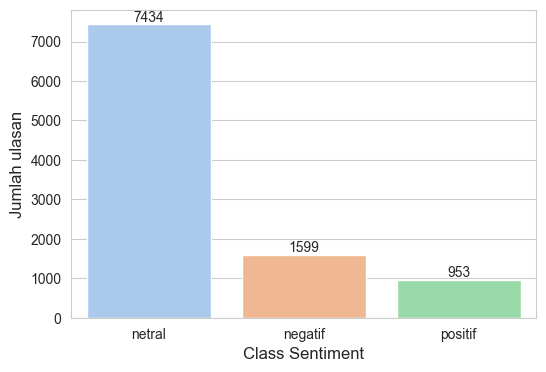

In [47]:
filtered_data = data[data['sentiment'] != 'unknown']
sentiment_count = filtered_data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah ulasan', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

In [48]:
file.to_csv("c:/Users/REVAN/Documents/ML/Sentiment analysis grab/hasillabelinggrab.csv", index=False)
data = pd.read_csv("c:/Users/REVAN/Documents/ML/Sentiment analysis grab/hasillabelinggrab.csv", encoding='latin1')

In [49]:
file = pd.read_csv("c:/Users/REVAN/Documents/ML/Sentiment analysis grab/hasillabelinggrab.csv", encoding='latin1')

In [50]:
file = file.dropna(subset=['stemming_data'])
X_train, X_test, y_train, y_test = train_test_split(file['stemming_data'], file['sentiment'], test_size=0.3, random_state=82)

In [52]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [53]:
svm_model = SVC(kernel='linear', random_state=82)

svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=82)

In [54]:
y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

     negatif       0.95      0.81      0.88       461
      netral       0.92      1.00      0.96      2261
     positif       0.98      0.51      0.67       274

    accuracy                           0.92      2996
   macro avg       0.95      0.77      0.83      2996
weighted avg       0.93      0.92      0.92      2996



In [55]:
confusion_matrix = confusion_matrix(y_test, y_pred)

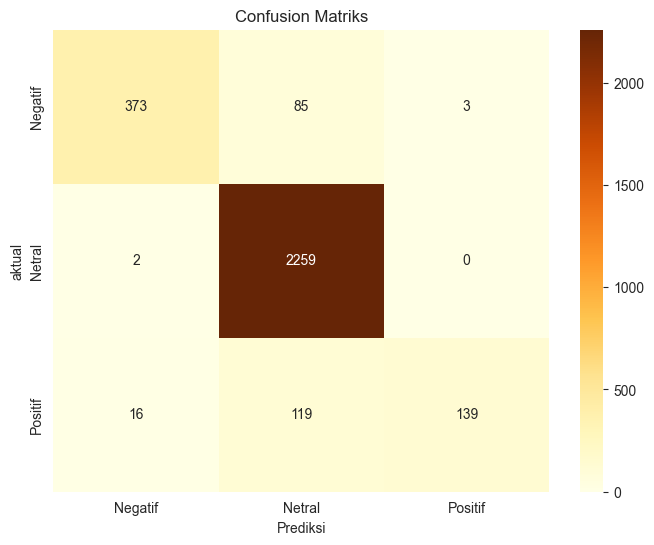

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.title('Confusion Matriks')
plt.xlabel('Prediksi')
plt.ylabel('aktual')
plt.show()

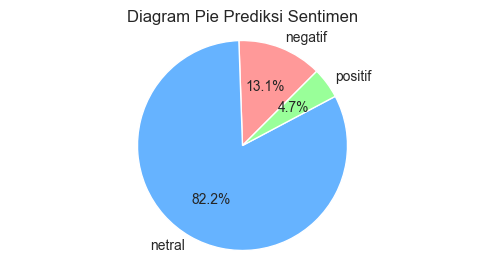

In [64]:
sentimen_unik, jumlah_sentimen = np.unique(y_pred, return_counts=True)

label = sentimen_unik.tolist()
ukuran = jumlah_sentimen.tolist()

warna = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  

plt.figure(figsize=(6, 3))  
plt.pie(ukuran, labels=label, colors=warna, autopct='%1.1f%%', startangle=45)
plt.title('Diagram Pie Prediksi Sentimen') 
plt.axis('equal')  

plt.show()